In [1353]:
import matplotlib.pyplot as plt
import numpy as np
import math

## Первая задача. Датчик псевдослучайных чисел (#1).

In [1354]:
size = 10000
bins = 'auto'
#bins = 50

In [1355]:
last_rand_value = 0.3
def get_rand(_last_rand_value):
    b = 9
    return math.exp(_last_rand_value + b) - int(math.exp(_last_rand_value + b))

In [1356]:
first_history = []
for i in range(size):
    last_rand_value = get_rand(last_rand_value)
    first_history.append(last_rand_value)

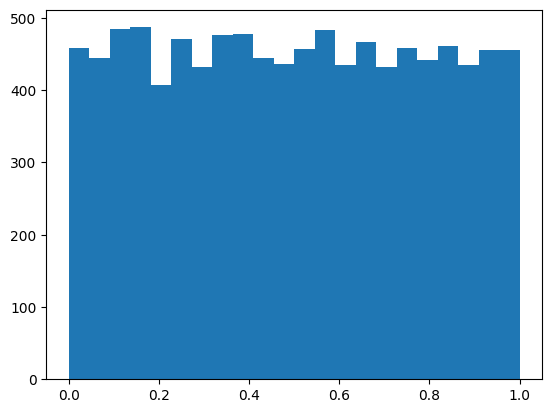

In [1357]:
plt.hist(first_history, bins=bins)
plt.show()

In [1358]:
first_history = np.array(first_history)

In [1359]:
first_mean = first_history.mean()
first_disp = math.pow(first_history.std(), 2)

In [1360]:
print(first_mean)
print(first_disp)

0.4978991789182215
0.08335690090516809


## Вторая задача. логнормальная СВ (#1).

In [1361]:
def log_norm(_x, _mean, _disp):
    return math.exp(math.sqrt(_disp)*_x + _mean)
def log_norm_p(_x, _mean, _disp):
    return math.exp(-(1/(2*_disp))*math.pow(math.log(_x,math.e)-_mean,2))/(math.sqrt(_disp)*_x*math.sqrt(2*math.pi))

In [1362]:
test = []
seed = 0.1
for i in range(size):
    summ = 0
    for j in range(12):
        seed = get_rand(seed)
        summ += seed
    test.append((summ - first_mean*12)/math.sqrt(first_disp*12))

In [1363]:
second_history = []
test = np.array(test)
first_disp = 0.25*0.25
first_mean = 0
for i in range(size):
    second_history.append(log_norm(test[i], first_mean, first_disp))

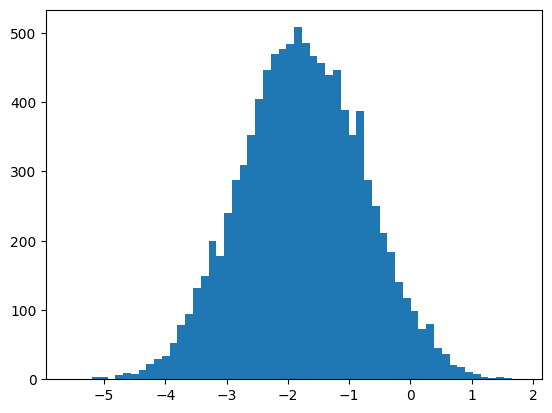

In [1364]:
test = test - max(test)/2
plt.hist(test, bins=bins)
plt.show()

In [1365]:
max(second_history)

2.437037896272321

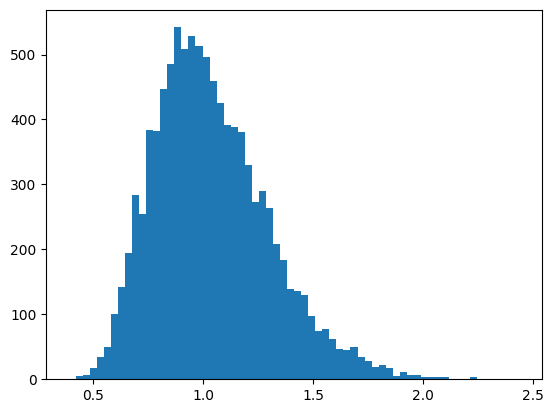

In [1366]:
plt.hist(second_history,bins=bins)
plt.show()

In [1367]:
second_history = np.array(second_history)

In [1368]:
second_mean = second_history.mean()
second_disp = math.pow(second_history.std(), 2)

In [1369]:
print((second_mean, second_disp))

(1.0380847110140519, 0.06926847328390869)


0.49861011821014956
0.32445028315934826


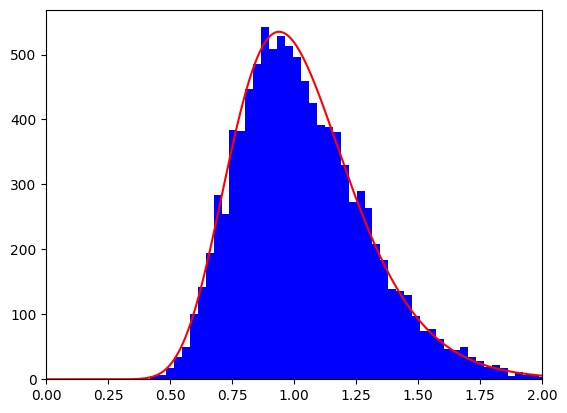

In [1370]:
p = []
normal = np.arange(0.0001, 2.0001, 0.0001)
stand = []
stand_max=max(second_history)
#first_disp = 1
#first_mean = 0
m = max(second_history)
for i in range(size*2):
    p.append(log_norm_p(normal[i], first_mean, first_disp))

p = np.array(p)
norm_mean = p.mean()
norm_disp = math.pow(p.std(), 2)

print(norm_mean)
print(norm_disp)

plt.figure()
plt.hist(second_history, bins=bins, color='blue')
plt.xlim(0, 2)
plt.plot(normal, p*325, color='red')

plt.show()

## Третья задача. Объём конус на цилиндре

In [1371]:
def in_cylinder(point, centre, r, h):
    if ((math.pow(centre[0]-point[0],2)+math.pow(centre[1]-point[1],2)) < math.pow(r, 2)) and ((point[2] <= (centre[2]+h))and((point[2] >= centre[2]))):
        return True
    return False

def in_cone(point, centre, r, h):    
    if ((centre[2] <= point[2]) and (point[2] <= (centre[2]+h))) and ((math.pow(centre[0]-point[0],2)+math.pow(centre[1]-point[1],2)) < math.pow((r/h)*((centre[2]+h)-point[2]), 2)):
        return True
    return False

In [1372]:
x = []
y = []
z = []

for i in range(size):
    last_rand_value = get_rand(last_rand_value)
    x.append(last_rand_value)

    last_rand_value = get_rand(last_rand_value)
    z.append(last_rand_value)

    last_rand_value = get_rand(last_rand_value)
    y.append(last_rand_value)

In [1373]:
counter = 0

cylinder = [[0.4, 0.4, 0.0], 0.3, 0.4]
cone = [[0.4, 0.4, 0.5], 0.3, 0.4]

In [1374]:
for i in range(size):
    if in_cylinder([x[i], y[i], z[i]], cylinder[0], cylinder[1], cylinder[2]) or in_cone([x[i], y[i], z[i]], cone[0], cone[1], cone[2]):
        counter+=1

In [1375]:
# Объём по точкам
print(counter/size)

0.1535


In [1376]:
# Среднеквадратичная ошибка
print(math.sqrt((size - counter)/(size*counter)))

0.02348330892454474


In [1377]:
counter_box = 0

for i in range(size):
    if ((x[i] >= min(cylinder[0][0]-cylinder[1], cone[0][0]-cone[1])) and (x[i] <= max(cylinder[0][0]+cylinder[1], cone[0][0]+cone[1]))) and ((y[i] >= min(cylinder[0][1]-cylinder[1], cone[0][1]-cone[1])) and (y[i] <= max(cylinder[0][1]+cylinder[1], cone[0][1]+cone[1]))) and ((z[i] >= min(cylinder[0][2], cone[0][2])) and (z[i] <= max(cylinder[0][2], cone[0][2]))):
        counter_box += 1

In [1378]:
# Количество точек в боксе
print(counter_box)

1796


In [1379]:
# Среднеквадратичная ошибка по боксу
print(math.sqrt((counter_box - counter)/(counter_box*counter)))

0.009730001284397534


In [1380]:
# Объём по формулам
v_cylinder = math.pi*cylinder[1]*cylinder[1]*cylinder[2]
v_cone = (1/3)*math.pi*cone[1]*cone[1]*cylinder[2]

print(v_cone+v_cylinder)

0.15079644737231007
